In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import networkx as nx
from statsmodels.formula.api import ols
from linearmodels.panel.data import PanelData
from linearmodels.panel import PanelOLS, FirstDifferenceOLS
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [200]:
df = pd.read_excel('/Users/jacopobinati/Desktop/thesis/Datasets/Data Finale_balanced1.xlsx')
df.head()

,Country,Year,Monthly Minimum Wage,CollectiveBargain_Coverage,TradeUnions_Density,Real Average Annual Wage Growth,Annual Inflation CPI,Gini Index,Labour force participation rate (Women age 15 to 64),Unemployment rate (Women age 15 to 64),...,"Children out of school, primary",Current health expenditure (% of GDP),Exports of goods and services (annual % growth),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net outflows (% of GDP)",Imports of goods and services (% of GDP),"Labor force, total",Labor tax and contributions (% of commercial profits),"Part time employment, total (% of total employment)",GDP (current US$)
0,Austria,1990,0.0,98.0,46.8,3.13,3.26,30.8,61.32,4.01,...,4616,9.2,8.57,0.39,1.02,35.79,3569407,35.3,20.4,1.664634e+11
1,Austria,1991,0.0,98.0,45.5,3.13,3.34,30.8,61.32,4.01,...,4616,9.2,2.94,0.21,0.74,35.46,3569407,35.3,20.4,1.737942e+11
2,Austria,1992,0.0,98.0,44.5,2.01,4.02,30.8,61.32,4.01,...,4616,9.2,1.32,0.76,0.90,34.47,3652067,35.3,20.4,1.950781e+11
3,Austria,1993,0.0,98.0,44.0,0.82,3.63,30.8,61.32,4.01,...,4616,9.2,-2.37,0.59,0.62,31.80,3684501,35.3,20.4,1.903797e+11
4,Austria,1994,0.0,98.0,41.5,1.01,2.95,30.8,61.32,4.01,...,4616,9.2,5.69,1.02,0.61,33.83,3851283,35.3,20.4,2.035352e+11


In [201]:
df['Country'].unique()
['Austria', 'Belgium', 'Czechia', 'Denmark', 'Estonia', ..., 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']


['Austria',
 'Belgium',
 'Czechia',
 'Denmark',
 'Estonia',
 Ellipsis,
 'Slovak Republic',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom']

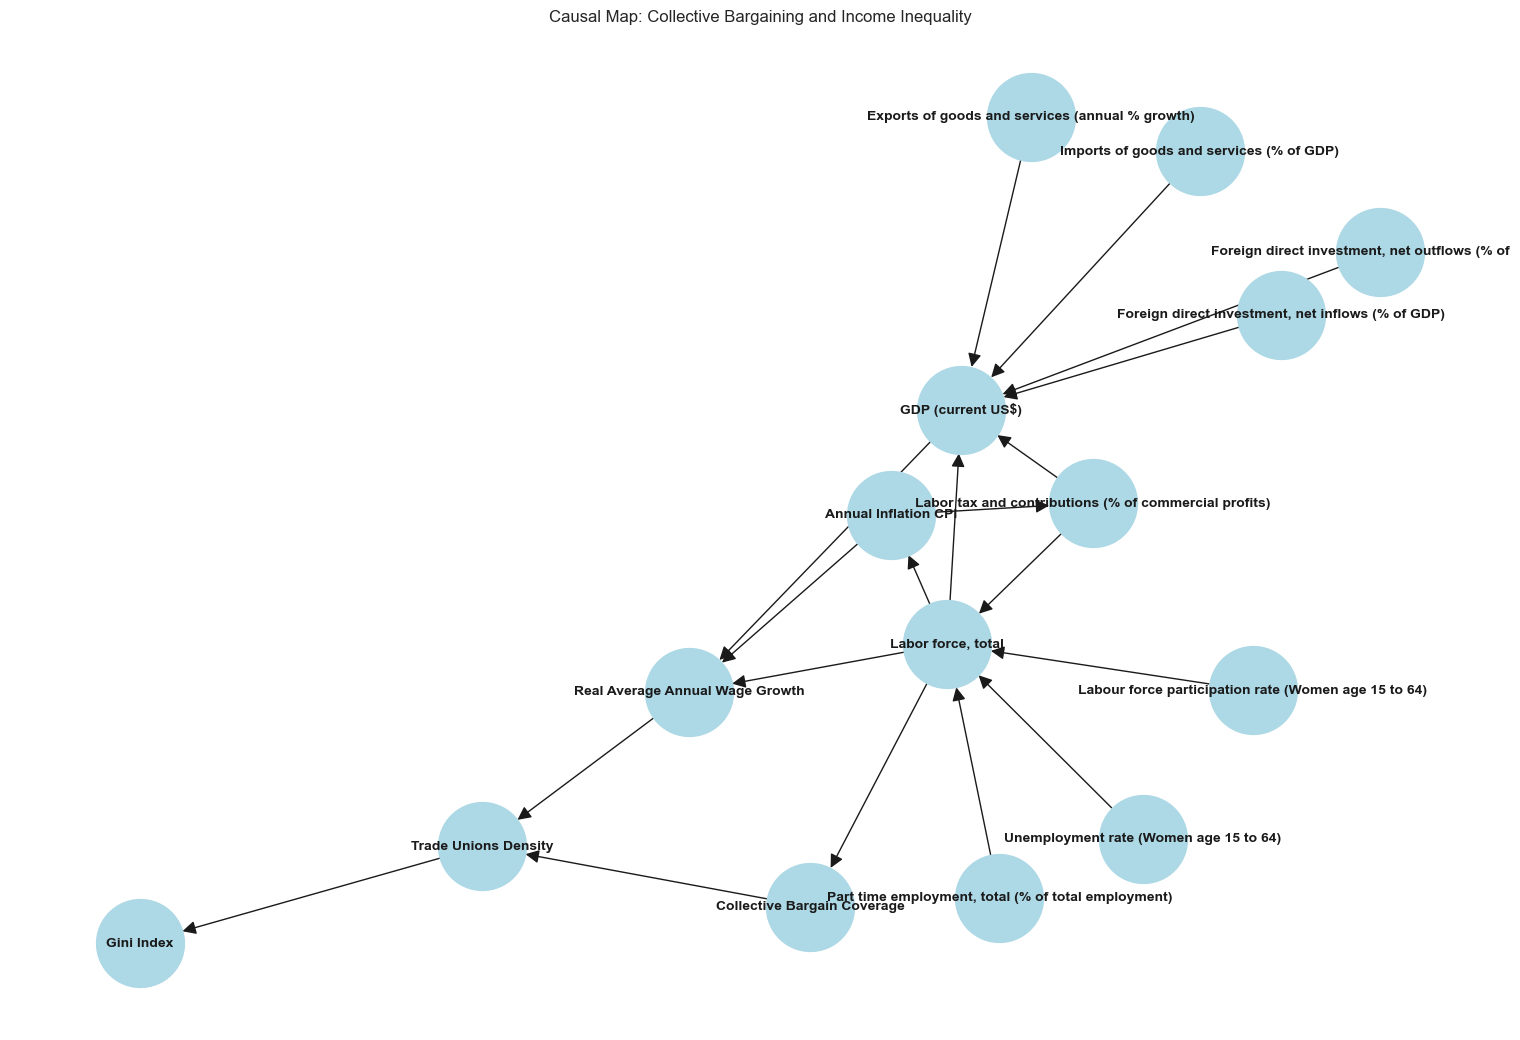

In [202]:
nodes_with_categories = {
    'Collective Bargain Coverage': 'Collective Bargaining',
    'Trade Unions Density': 'Collective Bargaining',
    'Gini Index': 'Income Inequality',
    'Real Average Annual Wage Growth': 'Economic',
    'Annual Inflation CPI': 'Economic',
    'Exports of goods and services (annual % growth)': 'Economic',
    'Foreign direct investment, net inflows (% of GDP)': 'Economic',
    'Foreign direct investment, net outflows (% of GDP)': 'Economic',
    'Imports of goods and services (% of GDP)': 'Economic',
    'Current health expenditure (% of GDP)': 'Economic',
    'Central government debt, total (% of GDP)': 'Economic',
    'GDP (current US$)': 'Economic',
    'Labour force participation rate (Women age 15 to 64)': 'Labor Market',
    'Unemployment rate (Women age 15 to 64)': 'Labor Market',
    'Labor force, total': 'Labor Market',
    'Labor tax and contributions (% of commercial profits)': 'Labor Market',
    'Part time employment, total (% of total employment)': 'Labor Market',
    'Monthly Minimum Wage': 'Labor Market'
}
edges = [
    ('Trade Unions Density', 'Gini Index'),
    ('Collective Bargain Coverage', 'Trade Unions Density'),
    ('Real Average Annual Wage Growth', 'Trade Unions Density'),
    ('Annual Inflation CPI', 'Real Average Annual Wage Growth'),
    ('Annual Inflation CPI', 'Labor tax and contributions (% of commercial profits)'),
    ('Labor tax and contributions (% of commercial profits)', 'GDP (current US$)'),
    ('Labor tax and contributions (% of commercial profits)', 'Labor force, total'),
    ('Part time employment, total (% of total employment)', 'Labor force, total'),
    ('Labour force participation rate (Women age 15 to 64)', 'Labor force, total'),
    ('Unemployment rate (Women age 15 to 64)', 'Labor force, total'),
    ('Labor force, total', 'Real Average Annual Wage Growth'),
    ('Labor force, total', 'Annual Inflation CPI'),
    ('Labor force, total', 'Collective Bargain Coverage'),
    ('Labor force, total', 'GDP (current US$)'),
    ('GDP (current US$)', 'Real Average Annual Wage Growth'),
    ('Exports of goods and services (annual % growth)', 'GDP (current US$)'),
    ('Foreign direct investment, net inflows (% of GDP)', 'GDP (current US$)'),
    ('Foreign direct investment, net outflows (% of GDP)', 'GDP (current US$)'),
    ('Imports of goods and services (% of GDP)', 'GDP (current US$)')
]

# Create the graph
G = nx.DiGraph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)

# Plotting
plt.figure(figsize=(15, 10))
nx.draw(G, pos, with_labels=True, node_size=4000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
plt.title("Causal Map: Collective Bargaining and Income Inequality")
plt.savefig("causal_map_collective_bargaining_and_income_inequality.png", format="PNG")
plt.show()

/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_4036/3550241094.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


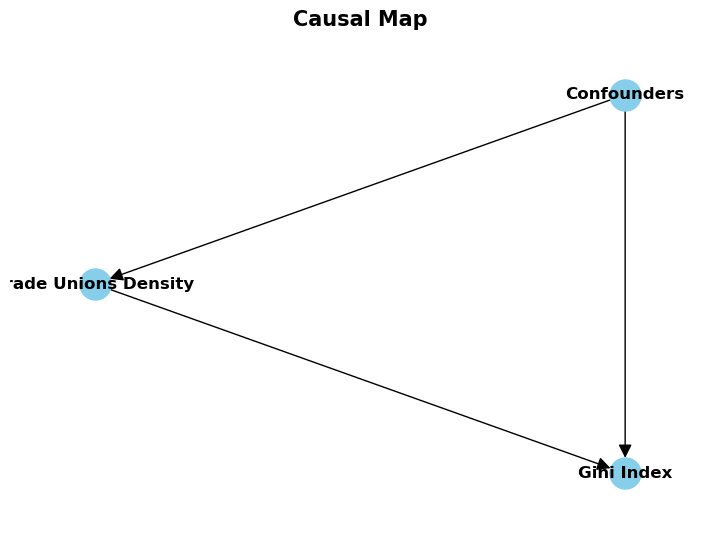

In [4]:
edges = [
    ('Trade Unions Density', 'Gini Index'),
    ('Confounders', 'Trade Unions Density'),
    ('Confounders', 'Gini Index')
]

P = nx.DiGraph()
P.add_edges_from(edges)

pos = nx.shell_layout(P)

plt.figure(figsize=(7, 5))  
nx.draw(P, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20)
plt.margins(0.1)
plt.title("Causal Map", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig("density_to_income_inequality.png", dpi=2000)  # Save the plot as a PNG file
plt.show()  

In [ ]:
edges = [
    ('Trade Unions Density', 'Gini Index'),
    ('De', 'Trade Unions Density'),
    ('Confounders', 'Gini Index')
]

# Create the directed graph
L = nx.DiGraph()
L.add_edges_from(edges)

pos = nx.spring_layout(P)

# Plotting
plt.figure(figsize=(5, 5))  # Size in inches, adjusted to match the PNG output size in the R code
nx.draw(L, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20)
plt.title("Causal Map")
plt.show()

# Variable Handling

In [88]:
df = pd.DataFrame(df)

In [89]:
df.rename(columns={
    'Labor force, total': 'Labor_force',
    'GDP (current US$)': 'GDP',
    'Annual Inflation CPI': 'Inflation',
    'Real Average Annual Wage Growth': 'WageGrowth',
    'Labour force participation rate (Women age 15 to 64)': 'Female_Workers',
    'TradeUnions_Density': 'TradeUnions_Density',  # Ensure this matches your original dataframe
    'Central government debt, total (% of GDP)': 'Gov_debt',
    'Unemployment rate (Women age 15 to 64)': 'WomenUnemployment_rate',
    'Current health expenditure (% of GDP)': 'Health_expenditure',
    'Exports of goods and services (annual % growth)': 'Exports_growth',
    'Imports of goods and services (% of GDP)': 'Imports_growth',
    'Foreign direct investment, net inflows (% of GDP)': 'FDI_inflow',
    'Foreign direct investment, net outflows (% of GDP)': 'FDI_outflow',
    'Labor tax and contributions (% of commercial profits)': 'Tax_contribution',
    'Part time employment, total (% of total employment)': 'Parttime_employment',
    'Monthly Minimum Wage': 'Monthly_Minimum_Wage',
    'Gini Index': 'Gini_Index',
}, inplace=True)

df.reset_index(drop=True, inplace=True)
print(df.columns)

Index(['Country', 'Year', 'Monthly_Minimum_Wage', 'CollectiveBargain_Coverage',
       'TradeUnions_Density', 'WageGrowth', 'Inflation', 'Gini_Index',
       'Female_Workers', 'WomenUnemployment_rate', 'Gov_debt',
       'Children out of school, primary', 'Health_expenditure',
       'Exports_growth', 'FDI_inflow', 'FDI_outflow', 'Imports_growth',
       'Labor_force', 'Tax_contribution', 'Parttime_employment', 'GDP'],
      dtype='object')


In [90]:
df['lnGDP'] = np.round(np.log(df['GDP']), 2)
df['minwage'] = (df['Monthly_Minimum_Wage'] > 0).astype(int)
df['lnminwage'] = np.where(df['Monthly_Minimum_Wage'] > 0, np.round(np.log(df['Monthly_Minimum_Wage']), 2), 0)
df['ln_labor'] = np.where(df['Labor_force'] > 0, np.round(np.log(df['Labor_force']), 2), 0)
df['bargain'] = df['TradeUnions_Density'] / df['CollectiveBargain_Coverage']
df['bargain1'] = np.sqrt(df['TradeUnions_Density']) * np.log(df['CollectiveBargain_Coverage'])
df['Year'] = df['Year'].astype(float)


print(df[['Monthly_Minimum_Wage', 'minwage', 'lnminwage']])


     Monthly_Minimum_Wage  minwage  lnminwage
0                     0.0        0        0.0
1                     0.0        0        0.0
2                     0.0        0        0.0
3                     0.0        0        0.0
4                     0.0        0        0.0
..                    ...      ...        ...
787                   0.0        0        0.0
788                   0.0        0        0.0
789                   0.0        0        0.0
790                   0.0        0        0.0
791                   0.0        0        0.0

[792 rows x 3 columns]


/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [91]:
df_long = pd.melt(df, id_vars=['Year', 'Country'], value_vars=['Gini_Index', 'TradeUnions_Density'], var_name='Indicator', value_name='Value')


In [92]:
print(df.isna().mean())

Country                            0.0
Year                               0.0
Monthly_Minimum_Wage               0.0
CollectiveBargain_Coverage         0.0
TradeUnions_Density                0.0
WageGrowth                         0.0
Inflation                          0.0
Gini_Index                         0.0
Female_Workers                     0.0
WomenUnemployment_rate             0.0
Gov_debt                           0.0
Children out of school, primary    0.0
Health_expenditure                 0.0
Exports_growth                     0.0
FDI_inflow                         0.0
FDI_outflow                        0.0
Imports_growth                     0.0
Labor_force                        0.0
Tax_contribution                   0.0
Parttime_employment                0.0
GDP                                0.0
lnGDP                              0.0
minwage                            0.0
lnminwage                          0.0
ln_labor                           0.0
bargain                  

In [93]:
first_year_positive_lnminwage = df[df['lnminwage'] > 0].groupby('Country')['Year'].min().reset_index(name='FirstYear')
minwage_introduced = df[df['lnminwage'] > 0].groupby('Country')['Year'].min().reset_index(name='FirstYear')
df_long = df_long.merge(minwage_introduced, on='Country', how='left')

In [94]:
df['Gini_Index001'] = df['Gini_Index']/100
df['Gini_Index'].describe(), df['Gini_Index001'].describe()

(count    792.000000
 mean      30.933838
 std        4.062171
 min       20.700000
 25%       27.500000
 50%       30.800000
 75%       34.125000
 max       38.900000
 Name: Gini_Index, dtype: float64,
 count    792.000000
 mean       0.309338
 std        0.040622
 min        0.207000
 25%        0.275000
 50%        0.308000
 75%        0.341250
 max        0.389000
 Name: Gini_Index001, dtype: float64)

# Data Visualisation

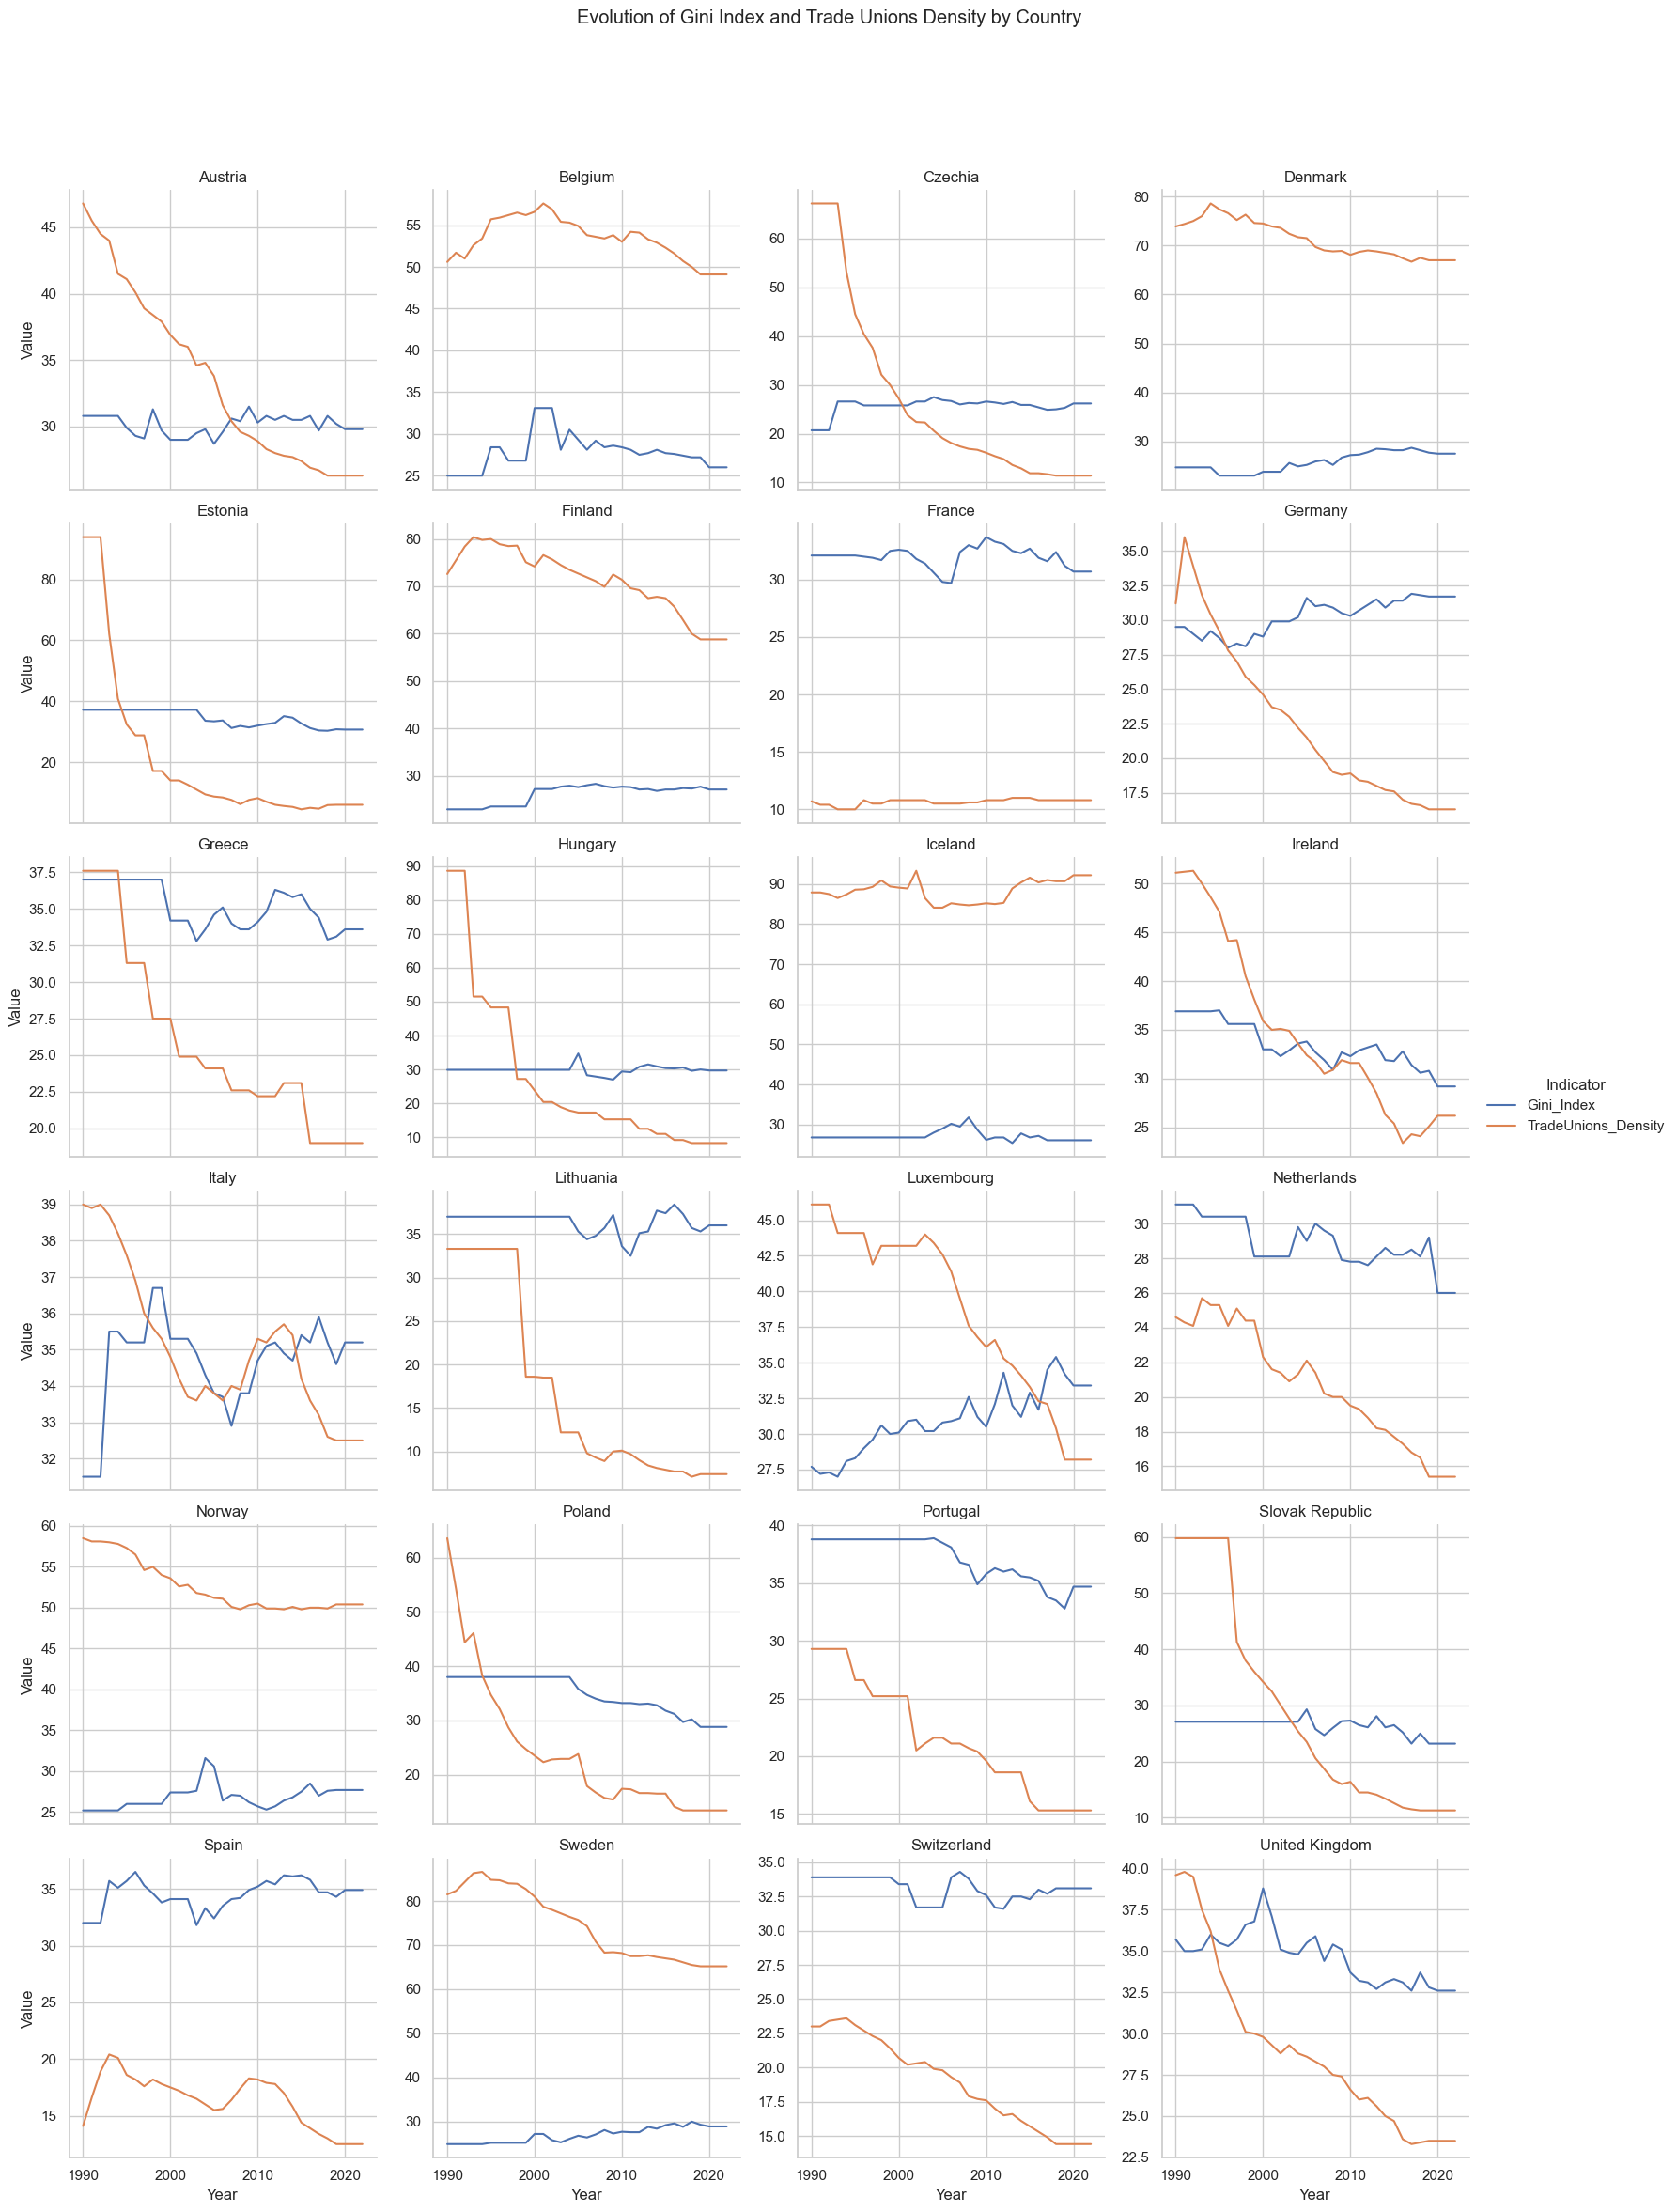

In [95]:
# Setting seaborn style for plots
sns.set_theme(style="whitegrid")

# Evolution of Gini Index and Trade Unions Density by Country
g = sns.FacetGrid(df_long, col="Country", hue="Indicator", col_wrap=4, height=4, sharey=False)
g = g.map(plt.plot, "Year", "Value").add_legend().set_titles("{col_name}").set_axis_labels("Year", "Value")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Evolution of Gini Index and Trade Unions Density by Country")
plt.show()

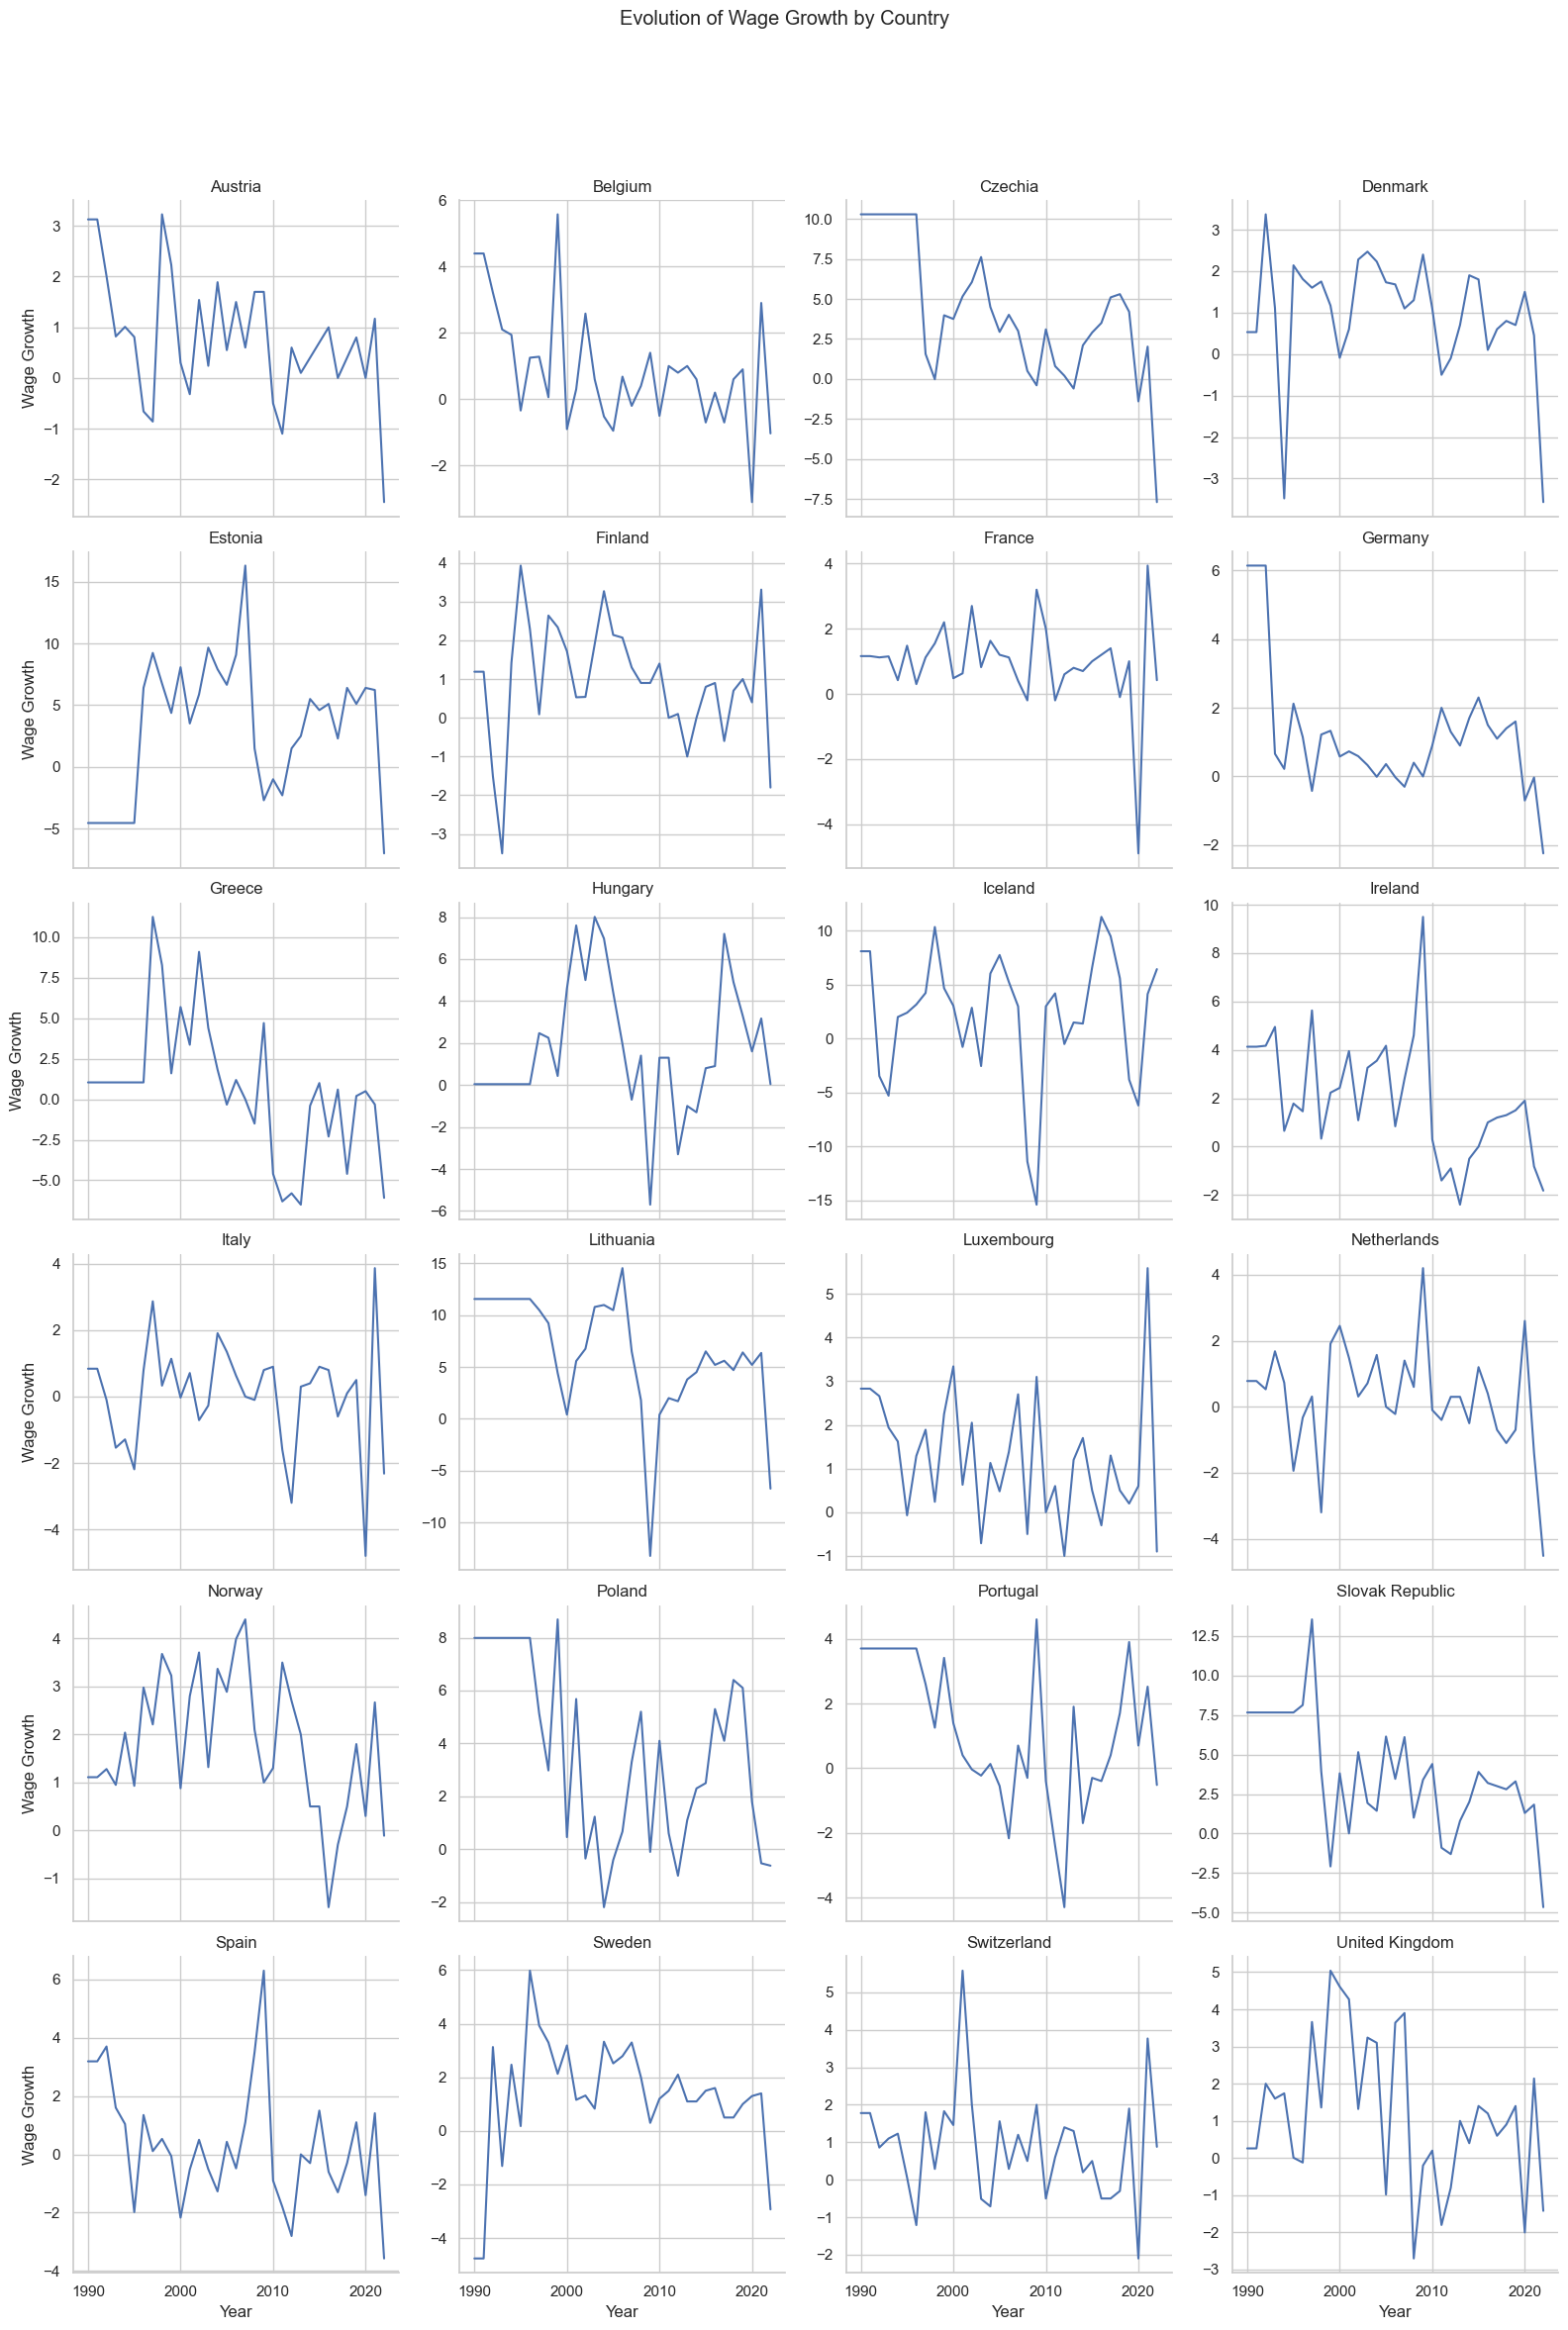

In [96]:
# Evolution of Wage Growth by Country
g = sns.FacetGrid(df, col="Country", col_wrap=4, height=4, sharey=False)
g = g.map(plt.plot, "Year", "WageGrowth").set_titles("{col_name}").set_axis_labels("Year", "Wage Growth")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Evolution of Wage Growth by Country")
plt.show()

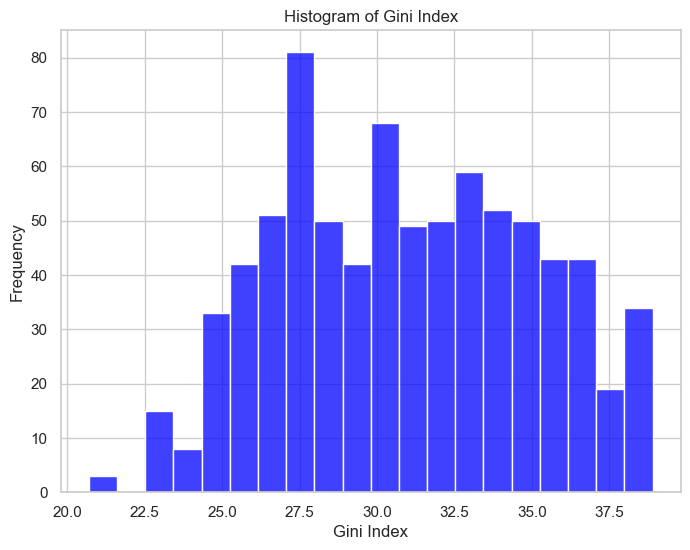

In [97]:
# Histogram for Gini Index
plt.figure(figsize=(8, 6))
sns.histplot(df['Gini_Index'], bins=20, color="blue", kde=False)
plt.title("Histogram of Gini Index")
plt.xlabel("Gini Index")
plt.ylabel("Frequency")
plt.show()

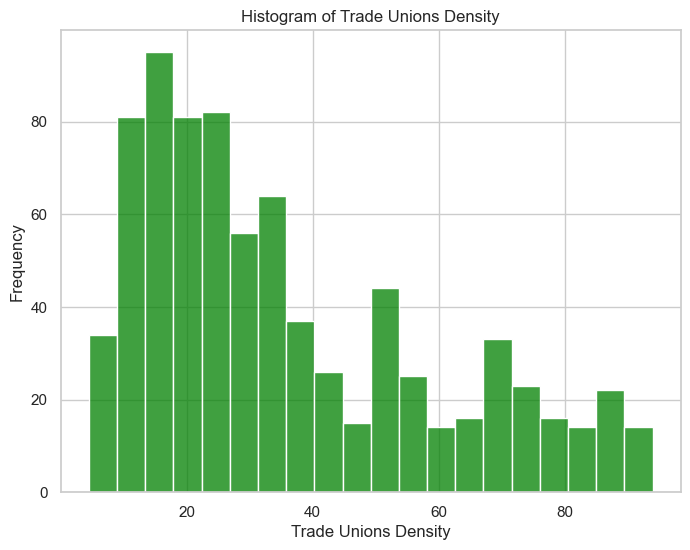

In [98]:
# Histogram for Trade Unions Density
plt.figure(figsize=(8, 6))
sns.histplot(df['TradeUnions_Density'], bins=20, color="green", kde=False)
plt.title("Histogram of Trade Unions Density")
plt.xlabel("Trade Unions Density")
plt.ylabel("Frequency")
plt.show()

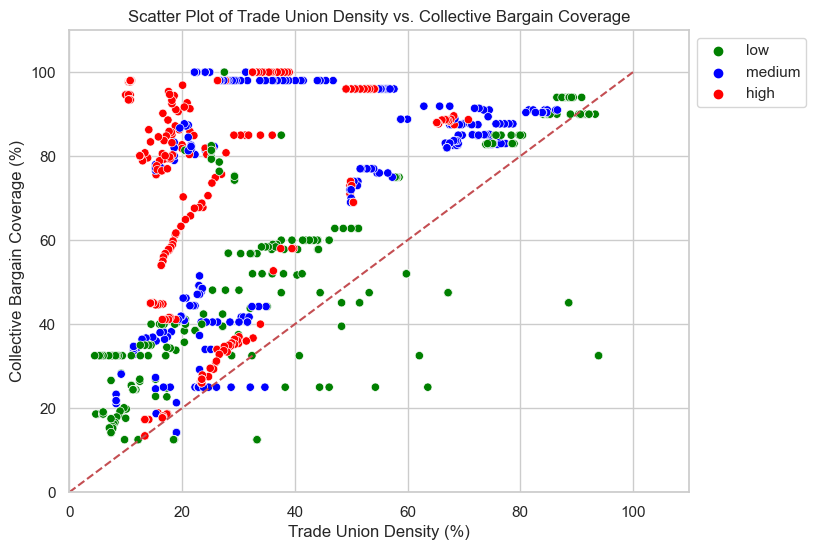

In [99]:
# Scatter Plot of Trade Union Density vs. Collective Bargain Coverage

df['lnGDP_Group'] = pd.qcut(df['lnGDP'], 3, labels=["low", "medium", "high"])
palette = {"low": "green", "medium": "blue", "high": "red"}
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TradeUnions_Density', y='CollectiveBargain_Coverage', hue='lnGDP_Group', palette=palette)
plt.plot([0, 100], [0, 100], 'r--')
plt.xlim(0, 110)
plt.ylim(0, 110)
plt.title("Scatter Plot of Trade Union Density vs. Collective Bargain Coverage")
plt.xlabel("Trade Union Density (%)")
plt.ylabel("Collective Bargain Coverage (%)")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


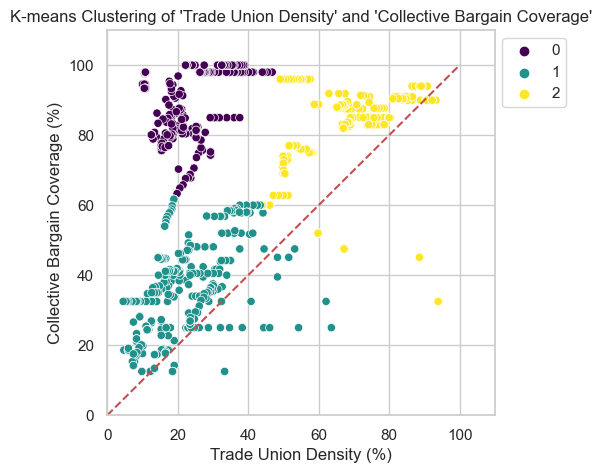

In [100]:
X = df[['TradeUnions_Density', 'CollectiveBargain_Coverage']]

# Create a KMeans instance with 3 clusters (as we have 3 groups: low, medium, high)
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model
kmeans.fit(X)

# Get the cluster labels
df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='TradeUnions_Density', y='CollectiveBargain_Coverage', hue='Cluster', palette='viridis')
plt.plot([0, 100], [0, 100], 'r--')
plt.xlim(0, 110)
plt.ylim(0, 110)
plt.title("K-means Clustering of 'Trade Union Density' and 'Collective Bargain Coverage'")
plt.xlabel("Trade Union Density (%)")
plt.ylabel("Collective Bargain Coverage (%)")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

In [101]:
# Group by 'Cluster', 'Country', and 'Year' and count the number of rows for each group
cluster_composition = df.groupby(['Cluster', 'Country', 'Year']).size().reset_index(name='Count')
readable_df = cluster_composition.pivot_table(index=['Country', 'Year'], columns='Cluster', values='Count', fill_value=0)
readable_df.reset_index(inplace=True)

# Print the readable dataframe
readable_df

Cluster,Country,Year,0,1,2
0,Austria,1990.0,1,0,0
1,Austria,1991.0,1,0,0
2,Austria,1992.0,1,0,0
3,Austria,1993.0,1,0,0
4,Austria,1994.0,1,0,0
...,...,...,...,...,...
787,United Kingdom,2018.0,0,1,0
788,United Kingdom,2019.0,0,1,0
789,United Kingdom,2020.0,0,1,0
790,United Kingdom,2021.0,0,1,0


In [102]:
# Calculate the percentage of observations for each cluster
cluster_counts = cluster_composition['Cluster'].value_counts(normalize=True) * 100
cluster_counts.round(1)


Cluster
1    40.9
0    30.2
2    28.9
Name: proportion, dtype: float64

## Correlation Matrix

/Users/jacopobinati/opt/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


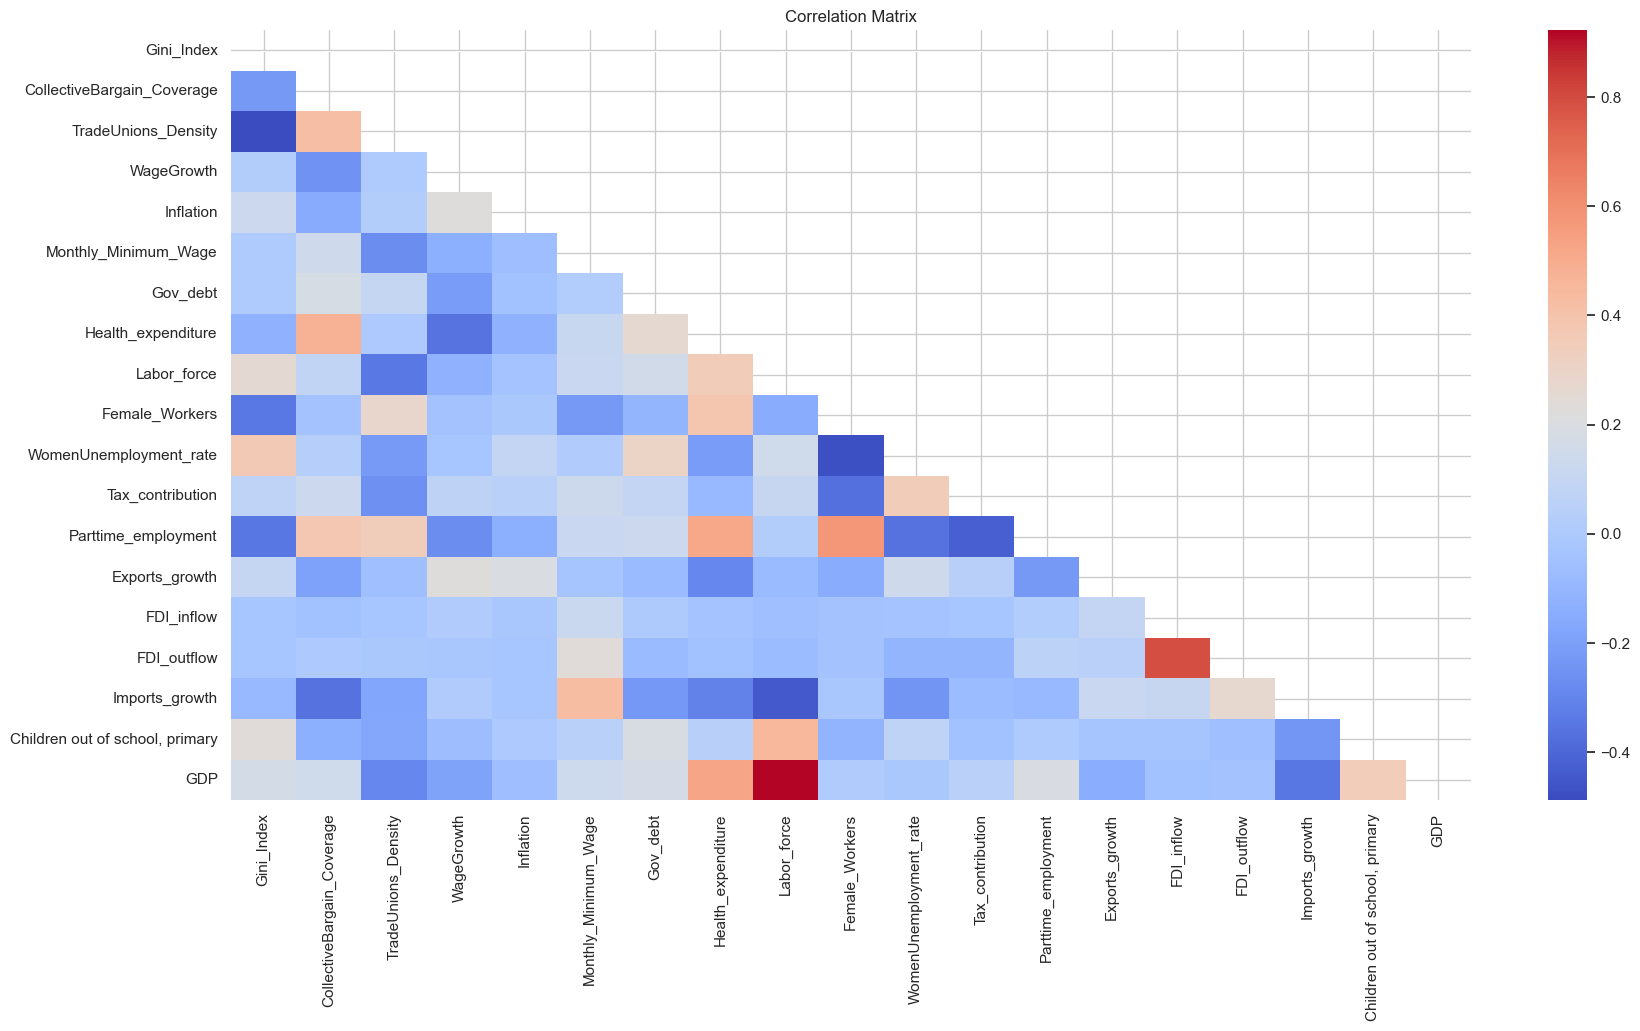

In [103]:
variables = ['Gini_Index', 'CollectiveBargain_Coverage',
             'TradeUnions_Density', 'WageGrowth', 'Inflation', 'Monthly_Minimum_Wage',
             'Gov_debt', 'Health_expenditure', 'Labor_force', 'Female_Workers',
             'WomenUnemployment_rate', 'Tax_contribution', 'Parttime_employment',
             'Exports_growth', 'FDI_inflow', 'FDI_outflow', 'Imports_growth',
             'Children out of school, primary', 'GDP']
df_small = df[variables]
corr_matrix = df_small.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

# Relation between Coverage and Density over time

In [104]:
df['Country'] = df['Country'].astype('category')
df['Year'] = df['Year'].astype('category')

## Regression

In [105]:
model_formulas = [
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + bargain1 + Inflation + WageGrowth",
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + bargain1 + Inflation + WageGrowth + lnminwage",
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + bargain1 + Inflation + WageGrowth + lnminwage + lnGDP + Gov_debt",
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + bargain1 + Inflation + WageGrowth + lnminwage + lnGDP + Gov_debt + ln_labor + Female_Workers + Parttime_employment + WomenUnemployment_rate",
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + bargain1 + Inflation + WageGrowth + lnminwage + lnGDP + Gov_debt + ln_labor + Female_Workers + Parttime_employment + WomenUnemployment_rate + Exports_growth + Imports_growth",
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + bargain1 + Inflation + WageGrowth + lnminwage + lnGDP + Gov_debt + ln_labor + Female_Workers + Parttime_employment + WomenUnemployment_rate + Exports_growth + Imports_growth + FDI_inflow + FDI_outflow + Tax_contribution"
]

In [106]:
df['Year'] = df['Year'].astype(int)
df['Country'] = df['Country'].astype('category')
pdata = PanelData(df.set_index(['Country', 'Year']))

In [107]:
from patsy import dmatrices
from statsmodels.regression.linear_model import OLS

def create_models(data, type, formulas):
    models = []
    for formula in formulas:
        if type == "OLS":
            y, X = dmatrices(formula, data=data, return_type='dataframe')
            model = OLS(y, X).fit().get_robustcov_results()
            models.append(model)
        elif type == "FE":
            model = PanelOLS.from_formula(formula, data=data, drop_absorbed=True).fit(cov_type='robust')
            models.append(model)
        elif type == "FD":
            model = FirstDifferenceOLS.from_formula(formula, data=data).fit(cov_type='robust')
            models.append(model)
        else:
            raise ValueError("Unknown model type")
    return models


In [108]:
# Create OLS, FE, and FD models
ols_models = create_models(df, "OLS", model_formulas)
fe_models = create_models(pdata, "FE", model_formulas)
fd_models = create_models(pdata, "FD", model_formulas)

In [109]:
for model in ols_models:
    print(model.summary())
for model in fe_models:
    print(model)
for model in fd_models:
    print(model)

                            OLS Regression Results                            
Dep. Variable:             Gini_Index   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     72.95
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           2.91e-72
Time:                        14:51:41   Log-Likelihood:                -2110.2
No. Observations:                 792   AIC:                             4234.
Df Residuals:                     785   BIC:                             4267.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

# Institutional Data

In [176]:
rol = pd.read_csv("/Users/jacopobinati/Desktop/thesis/Datasets/rule-of-law-index.csv")
part = pd.read_csv("/Users/jacopobinati/Desktop/thesis/Datasets/civil-society-participation-index.csv")
rol.head()

,Entity,Code,Year,rule_of_law_vdem_owid,rule_of_law_vdem_high_owid,rule_of_law_vdem_low_owid
0,Afghanistan,AFG,1789,0.389,0.525,0.29
1,Afghanistan,AFG,1790,0.389,0.525,0.29
2,Afghanistan,AFG,1791,0.389,0.525,0.29
3,Afghanistan,AFG,1792,0.389,0.525,0.29
4,Afghanistan,AFG,1793,0.389,0.525,0.29


In [177]:
part.head()

,Entity,Code,Year,civsoc_particip_vdem_owid,civsoc_particip_vdem_low_owid,civsoc_particip_vdem_high_owid
0,Afghanistan,AFG,1789,0.215,0.1,0.373
1,Afghanistan,AFG,1790,0.215,0.1,0.373
2,Afghanistan,AFG,1791,0.215,0.1,0.373
3,Afghanistan,AFG,1792,0.215,0.1,0.373
4,Afghanistan,AFG,1793,0.215,0.1,0.373


In [168]:
countries_to_keep = ['Austria', 'Belgium', 'Czechia', 'Denmark', 'Estonia', 'Finland', 
                     'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 
                     'Italy', 'Lithuania', 'Luxemburg', 'Netherlands', 'Norway', 'Poland', 
                     'Portugal', 'Slovak Republik', 'Spain', 'Sweden', 'Switzerland', 
                     'United Kingdom']

# Filter rol and part data
rol = rol[(rol['Year'] >= 1990) & (rol['Entity'].isin(countries_to_keep))]
part = part[(part['Year'] >= 1990) & (part['Entity'].isin(countries_to_keep))]

In [ ]:
rol.head()
part.head()

In [169]:

columns_to_drop1 = ['civsoc_particip_vdem_low_owid',	'civsoc_particip_vdem_high_owid']
columns_to_drop2 = ['rule_of_law_vdem_low_owid', 'rule_of_law_vdem_high_owid']
rol.drop(columns=columns_to_drop2, inplace=True)
part.drop(columns=columns_to_drop1, inplace=True)

In [170]:

rol = rol.rename(columns={'rule_of_law_vdem_owid': 'rol',
                          'Entity': 'Country'})
part = part.rename(columns={'civsoc_particip_vdem_owid': 'civsoc_particip',
                            'Entity': 'Country'})

rol.head(), part.head()

(      Country Code  Year    rol
 1827  Austria  AUT  1990  0.957
 1828  Austria  AUT  1991  0.957
 1829  Austria  AUT  1992  0.957
 1830  Austria  AUT  1993  0.957
 1831  Austria  AUT  1994  0.957,
       Country Code  Year  civsoc_particip
 1359  Austria  AUT  1990            0.962
 1360  Austria  AUT  1991            0.962
 1361  Austria  AUT  1992            0.962
 1362  Austria  AUT  1993            0.962
 1363  Austria  AUT  1994            0.962)

In [171]:
# Assuming 'rol' and 'part' are dataframes with 'Country' and 'Year' columns
df = pd.merge(df, rol, on=['Country', 'Year'], how='left')
df = pd.merge(df, part, on=['Country', 'Year'], how='left')


# New dataset with Political variables

In [173]:
dataset = df.copy()

In [174]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          792 non-null    object  
 1   Year                             792 non-null    int64   
 2   Monthly_Minimum_Wage             792 non-null    float64 
 3   CollectiveBargain_Coverage       792 non-null    float64 
 4   TradeUnions_Density              792 non-null    float64 
 5   WageGrowth                       792 non-null    float64 
 6   Inflation                        792 non-null    float64 
 7   Gini_Index                       792 non-null    float64 
 8   Female_Workers                   792 non-null    float64 
 9   WomenUnemployment_rate           792 non-null    float64 
 10  Gov_debt                         792 non-null    float64 
 11  Children out of school, primary  792 non-null    int64   
 12  Health_e

In [175]:
dropdf = ['Code_x', 'Code_y']
dataset.drop(columns=dropdf, inplace=True)

,Country,Year,Monthly_Minimum_Wage,CollectiveBargain_Coverage,TradeUnions_Density,WageGrowth,Inflation,Gini_Index,Female_Workers,WomenUnemployment_rate,...,minwage,lnminwage,ln_labor,bargain,bargain1,Gini_Index001,lnGDP_Group,Cluster,rol,civsoc_particip
0,Austria,1990,0.0,98.0,46.8,3.13,3.26,30.8,61.32,4.01,...,0,0.0,15.09,0.477551,31.366003,0.308,medium,0,0.957,0.962
1,Austria,1991,0.0,98.0,45.5,3.13,3.34,30.8,61.32,4.01,...,0,0.0,15.09,0.464286,30.927296,0.308,medium,0,0.957,0.962
2,Austria,1992,0.0,98.0,44.5,2.01,4.02,30.8,61.32,4.01,...,0,0.0,15.11,0.454082,30.585548,0.308,medium,0,0.957,0.962
3,Austria,1993,0.0,98.0,44.0,0.82,3.63,30.8,61.32,4.01,...,0,0.0,15.12,0.448980,30.413234,0.308,medium,0,0.957,0.962
4,Austria,1994,0.0,98.0,41.5,1.01,2.95,30.8,61.32,4.01,...,0,0.0,15.16,0.423469,29.536587,0.308,medium,0,0.957,0.962


# New MODELS

In [ ]:
dataset['demo'] = dataset['civsoc_particip'] * dataset['rol']

In [179]:
from linearmodels.iv import IV2SLS


In [190]:
models_new = [
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + Inflation + [bargain1 ~ demo]",
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + Inflation + Gov_debt + [bargain1 ~ demo]",
    "Gini_Index ~ TradeUnions_Density + CollectiveBargain_Coverage + Inflation + Gov_debt + ln_labor + Female_Workers + Parttime_employment + WomenUnemployment_rate+ [bargain1 ~ demo]"
]
dataset['Year'] = dataset['Year'].astype(int)
dataset['Country'] = dataset['Country'].astype('category')
pdata_new = PanelData(dataset.set_index(['Country', 'Year']))


In [192]:
def create_modelsIV(data, type, formulas):
    models2 = []
    for formula in formulas:
        if type == "IV":
            model2 = IV2SLS.from_formula(formula, data=data).fit(cov_type='robust')
            models2.append(model2)
        else:
            raise ValueError("Unknown model type")
    return models2